In [1]:
from PIL import Image
import numpy as np
import sys, dlib
import cv2
import matplotlib.pyplot as plt

In [3]:
image_path = "../datasets/images.npy"
images = np.load(image_path)
images = images.astype(np.uint8)
images = np.stack([images, images, images], axis=3)
images.shape

(35538, 48, 48, 3)

In [4]:
detector = dlib.cnn_face_detection_model_v1("./mmod_human_face_detector.dat")
sp = dlib.shape_predictor("./shape_predictor_5_face_landmarks.dat")
aligned_images = []
for i in range(images.shape[0]):
    image = images[i]
    dets = detector(image, 1)
    if len(dets) > 0:
        faces = dlib.full_object_detections()
        for detection in dets:
            faces.append(sp(images[i], detection.rect))
        image = dlib.get_face_chip(image, faces[0], size=48)
    aligned_images.append(image)
    if i%100==0:
        print(i, "/", images.shape[0])
aligned_images = np.array(aligned_images)
print(aligned_images.shape)

0 / 35538
100 / 35538
200 / 35538
300 / 35538
400 / 35538
500 / 35538
600 / 35538
700 / 35538
800 / 35538
900 / 35538
1000 / 35538
1100 / 35538
1200 / 35538
1300 / 35538
1400 / 35538
1500 / 35538
1600 / 35538
1700 / 35538
1800 / 35538
1900 / 35538
2000 / 35538
2100 / 35538
2200 / 35538
2300 / 35538
2400 / 35538
2500 / 35538
2600 / 35538
2700 / 35538
2800 / 35538
2900 / 35538
3000 / 35538
3100 / 35538
3200 / 35538
3300 / 35538
3400 / 35538
3500 / 35538
3600 / 35538
3700 / 35538
3800 / 35538
3900 / 35538
4000 / 35538
4100 / 35538
4200 / 35538
4300 / 35538
4400 / 35538
4500 / 35538
4600 / 35538
4700 / 35538
4800 / 35538
4900 / 35538
5000 / 35538
5100 / 35538
5200 / 35538
5300 / 35538
5400 / 35538
5500 / 35538
5600 / 35538
5700 / 35538
5800 / 35538
5900 / 35538
6000 / 35538
6100 / 35538
6200 / 35538
6300 / 35538
6400 / 35538
6500 / 35538
6600 / 35538
6700 / 35538
6800 / 35538
6900 / 35538
7000 / 35538
7100 / 35538
7200 / 35538
7300 / 35538
7400 / 35538
7500 / 35538
7600 / 35538
7700 / 3553

In [9]:
aligned_images[:,:,:,0].reshape(35538, 48, 48, 1).shape

(35538, 48, 48, 1)

In [10]:
image_path = "../datasets/aligned_images.npy"
try:
    savebuffer_images = aligned_images[:,:,:,0].reshape(35538, 48, 48, 1)
except Exception:
    print("error")
np.save(image_path, savebuffer_images)

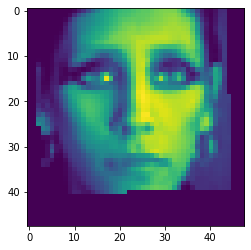

In [16]:
plt.imshow(images[4], interpolation='nearest')  #cmap='gray'
plt.show()